              age         sex          cp    trestbps        chol         fbs  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean    54.462898    0.681979    0.968198  131.180212  246.388693    0.148410   
std      9.141589    0.466533    1.029208   16.946914   50.667713    0.356136   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.000000   
25%     48.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  192.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean     0.537102  149.862191    0.321555    1.019435    1.413428    0.731449   
std      0.527137   22.7647

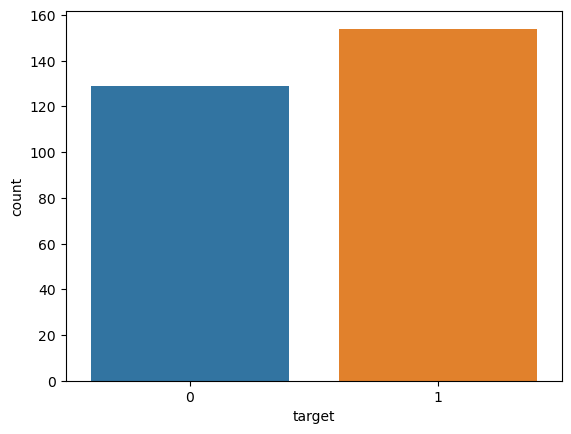

Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVM: 0.82743961352657
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 10}
Best score for Decision Tree: 0.7252173913043478
Best parameters for Random Forest: {'max_features': 'sqrt', 'n_estimators': 200}
Best score for Random Forest: 0.7962318840579711
Best parameters for K-Nearest Neighbors: {'n_neighbors': 11, 'weights': 'uniform'}
Best score for K-Nearest Neighbors: 0.8184541062801932
Evaluation for SVM:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.81      0.90      0.85        29

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.85      0.84      0.84        57

Accuracy: 0.8421052631578947


/Users/vivekl/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vivekl/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivekl/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vivekl/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Us

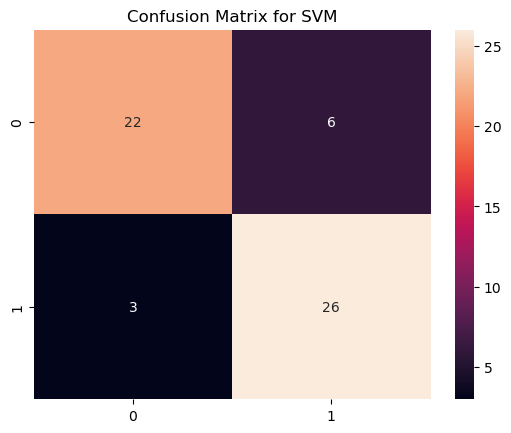

Evaluation for Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        28
           1       0.83      0.69      0.75        29

    accuracy                           0.77        57
   macro avg       0.78      0.77      0.77        57
weighted avg       0.78      0.77      0.77        57

Accuracy: 0.7719298245614035


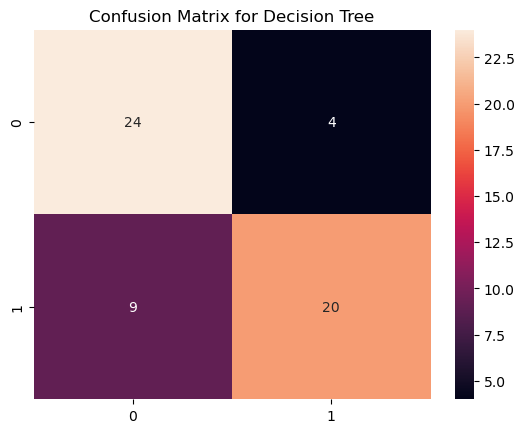

Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.80      0.83      0.81        29

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57

Accuracy: 0.8070175438596491


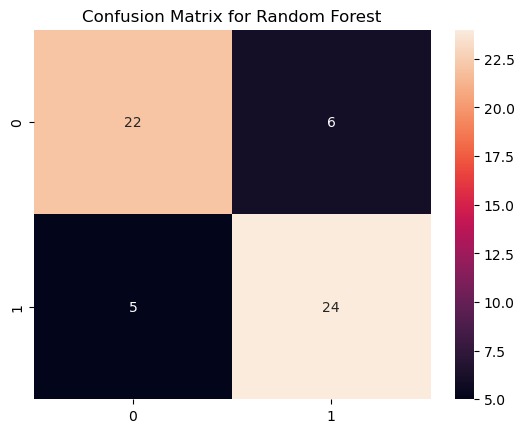

Evaluation for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.77      0.83      0.80        29

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57

Accuracy: 0.7894736842105263


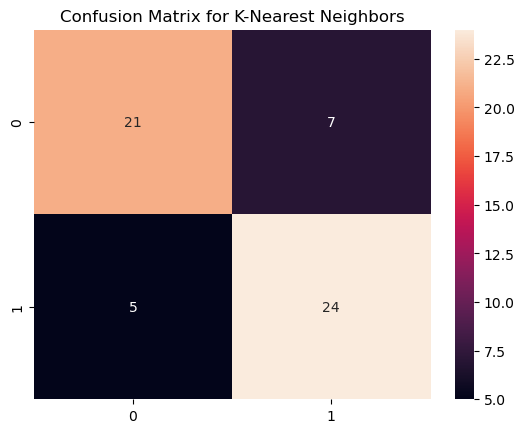

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('heart.csv')

# Separate 20 random samples for final evaluation
final_test_data = data.sample(n=20, random_state=42)
data = data.drop(final_test_data.index)

# Exploratory Data Analysis
print(data.describe())
print(data.info())
sns.countplot(x='target', data=data)
plt.show()

# Preprocessing for main dataset
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definitions
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Grid Search Setup
param_grid = {
    "SVM": {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 11], 'weights': ['uniform', 'distance']}
}

# Training and Hyperparameter Tuning
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

# Evaluate models with initial test data
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()



In [12]:
from sklearn.model_selection import cross_val_score

# Define a function to evaluate models using cross-validation
def evaluate_model(model, X, y, folds=10):
    cv_scores = cross_val_score(model, X, y, cv=folds, scoring='accuracy')
    return np.mean(cv_scores), np.std(cv_scores)

# Evaluate each model using cross-validation
model_performance = {}
for name, model in models.items():
    mean_cv_score, std_cv_score = evaluate_model(model, X_train, y_train)
    model_performance[name] = (mean_cv_score, std_cv_score)
    print(f"{name}: Accuracy = {mean_cv_score:.2f} +/- {std_cv_score:.2f}")

# Select the model with the highest mean accuracy
best_model_name = max(model_performance, key=lambda x: model_performance[x][0])
print(f"Selected Model: {best_model_name} with an average accuracy of {model_performance[best_model_name][0]:.2f}")

# You might also consider stability here by looking at the lowest standard deviation


SVM: Accuracy = 0.80 +/- 0.10
Decision Tree: Accuracy = 0.72 +/- 0.11
Random Forest: Accuracy = 0.80 +/- 0.12
K-Nearest Neighbors: Accuracy = 0.80 +/- 0.08
Selected Model: SVM with an average accuracy of 0.80


Final Evaluation with SVM:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Final Accuracy: 0.9


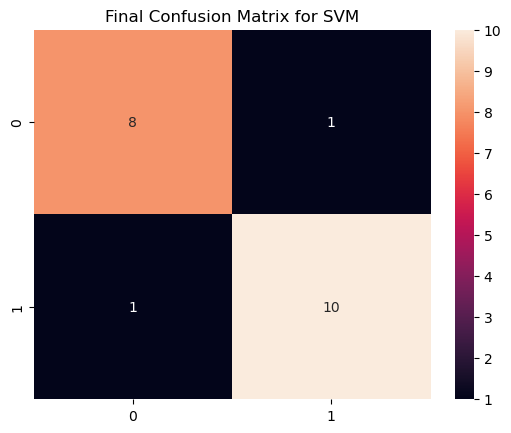

In [13]:
# Final preparation of the test data
final_X = final_test_data.drop('target', axis=1)
final_y = final_test_data['target']
final_X_scaled = scaler.transform(final_X)  # Use the same scaler as used for training data

# Using the best model (SVM) to predict the final test set
svm_best = best_estimators['SVM']  # Assuming svm_best is your best trained SVM model
final_predictions = svm_best.predict(final_X_scaled)

# Evaluating the final predictions
print("Final Evaluation with SVM:")
print(classification_report(final_y, final_predictions))
print(f"Final Accuracy: {accuracy_score(final_y, final_predictions)}")
sns.heatmap(confusion_matrix(final_y, final_predictions), annot=True)
plt.title('Final Confusion Matrix for SVM')
plt.show()